# Exercises - Week 7 - Feature Engineering
#### Simon Lee, BIO-322, Machine Learning for Bioengineers, Winter 2022

## Conceptual
#### Exercise 1
Suppose, for a regression problem with one-dimensional input $X$ and one-dimensional output $Y$ we use the feature functions $h_1(X) = X$, $h_2(X) = (X - 1)^2\chi(X\ge 1)$ (where $\chi$ is the indicator function, being 1 when the condition inside the brackets is true and 0 otherwise), fit the linear regression model $Y = \beta_0 + \beta_1h_1(X) + \beta_2h_2(X) + \varepsilon,$ and obtain coefficient estimates $\hat{\beta}_0 = 1$, $\hat{\beta}_1 = 1$, $\hat{\beta}_2 = -2$. Draw the estimated curve between $X = -2$ and $X = 2$.


### Solution

$$
\hat Y = \hat\beta_0 + \hat\beta_1 h_1(X) + \hat\beta_2h_2(X) = 1 + X - 2(X-1)^2I(X\geq1)`
$$`

$(plot(x -> 1 + x - 2*(max(0, x-1))^2, xlims = (-2, 2), legend = false, xlabel = "X", ylabel = "Ŷ"))



#### Exercise 2
The following table shows one-hot encoded input for columns `mean_of_transport` (car, train, airplane, ship) and `energy_source` (petrol, electric). Indicate for each row the mean of transport and the energy source.
| car | train | airplane | petrol|
|-----|-------|----------|-------|
| 1   | 0     | 0        |  0    |
| 0   | 0     | 0        |  1    |
| 0   | 1     | 0        |  1    |
| 0   | 0     | 0        |  0    |

### Solution
- electric car
- petrol ship
- petrol train
- electric ship


#### Exercise 3
In the \"Vector Features\" section we said that the xor problem has a non-linear decision boundary in the original $X_1, X_2$ coordinates, but a linear decision boundary in the $H_1, H_2, H_3, H_4$ coordinates. Here we prove that $-H_1 + H_2 + H_3 - H_4 = 0$ defines indeed a linear decision boundary that solves the xor-problem.
* Show that $-H_1 + H_2 + H_3 - H_4  < 0$ for all points with $X_1 > 0$ and $X_2 > 0$.
* Show that $-H_1 + H_2 + H_3 - H_4  < 0$ for all points with $X_1 < 0$ and $X_2 < 0$.
* Show that $-H_1 + H_2 + H_3 - H_4  > 0$ for all other points.

### Solution
We used the vector features $w_1 = [1, 1]$, $w_2 = [1, -1]$, $w_3 = [-1, 1]$ and $w_4 = [-1, -1]$. Therefore $H_1 = \max(0, X_1 + X_2)$, $H_2 = \max(0, X_1 - X_2)$, $H_3 = \max(0, -X_1 + X_2)$, $H_4 = \max(0, -X_1 - X_2)$.
* For $X_1 > 0$ and $X_2 > 0$ we have $H_4 = 0$ and $H_1 = X_1 + X_2$. Now we distringuish cases:
    * $X_1 > X_2$: $H_2 = X_1 - X_2$ and $H_3 = 0$. Therefore $-H_1 + H_2 + H_3 - H_4 = -X_1-X_2+X_1-X_2 = -2X_2 < 0$.
    * $X_1 < X_2$: $H_2 = 0$ and $H_3 = -X_1 + X_2$. Therefore $-H_1 + H_2 + H_3 - H_4 = -X_1-X_2-X_1 +X_2 = -2X_1 < 0$.
* We follow the same reasoning as above for the case $X_1 < 0$ and $X_2 < 0$. Here $H_1 = 0$ and $H_4 = -X_1-X_2$.
    * $X_1 > X_2$: $H_2 = X_1 - X_2$ and $H_3 = 0$. Therefore $-H_1 + H_2 + H_3 - H_4 = X_1-X_2+X_1+X_2 = 2X_1 < 0$
    * $X_1 < X_2$: $H_2 = 0$ and $H_3 = -X_1 + X_2$. Therefore $-H_1 + H_2 + H_3 - H_4 = -X_1+X_2+X_1+X_2 = 2X_2 < 0$
* For $X_1 > 0$ and $X_2 < 0$ we distinguish the cases where $|X_1| > |X_2|$ and where $|X_1| < |X_2|$.
    * $|X_1| > |X_2|$: $H_1 = X_1 + X_2$, $H_2 = X_1 - X_2$, $H_3 = H_4 = 0$. Therefore $-H_1 + H_2 + H_3 - H_4 = -X_1-X_2+X_1-X_2 = -2X_2 > 0$.
    * $|X_1| < |X_2|$: $H_4 = -X_1 - X_2$, $H_2 = X_1 - X_2$, $H_1 = H_3 = 0$. Therefore $-H_1 + H_2 + H_3 - H_4 = X_1-X_2+X_1+X_2 = 2X_1 > 0$.
* The last case is shown in a similar way as the above cases.

## Applied
#### Exercise 4
Load the mushroom data set `OpenML.load(24)` and determine if a linear logistic regression can correctly classify all datapoints if
   * rows with missing values are dropped.
   * rows with missing values are imputed with the most common class.
   * rows with missing values are imputed with the most common class.

In [1]:
begin
    using Pkg
    Pkg.activate(joinpath(Pkg.devdir(), "MLCourse"))
    using DataFrames, MLJ, MLJLinearModels, MLCourse, Random, Plots, OpenML
end

  Activating project at `~/.julia/dev/MLCourse`


In [2]:
data = OpenML.load(24) |> DataFrame

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing
,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…
1,x,s,n,t,p,f,c
2,x,s,y,t,a,f,c
3,b,s,w,t,l,f,c
4,x,y,w,t,p,f,c
5,x,s,g,f,n,f,w
6,x,y,y,t,a,f,c
7,b,s,w,t,a,f,c
8,b,y,w,t,l,f,c
9,x,y,w,t,p,f,c


First we try the version with all rows with missing values dropped.

In [3]:
data_m = dropmissing(data)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing
,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…
1,x,s,n,t,p,f,c
2,x,s,y,t,a,f,c
3,b,s,w,t,l,f,c
4,x,y,w,t,p,f,c
5,x,s,g,f,n,f,w
6,x,y,y,t,a,f,c
7,b,s,w,t,a,f,c
8,b,y,w,t,l,f,c
9,x,y,w,t,p,f,c


The dataframe has now much fewer rows than before. Next we encode all features with the `OneHotEncoder`

In [4]:
data_m_oh = MLJ.transform(fit!(machine(OneHotEncoder(drop_last = true), data_m)),
                          select(data_m, Not(:class)))

┌ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/machines.jl:496
┌ Info: Spawning 5 sub-features to one-hot encode feature :cap-shape.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 3 sub-features to one-hot encode feature :cap-surface.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 9 sub-features to one-hot encode feature :cap-color.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 1 sub-features to one-hot encode feature :bruises%3F.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 8 sub-features to one-hot encode feature :odor.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 3 sub-features

,cap-shape__b,cap-shape__c,cap-shape__f,cap-shape__k,cap-shape__s,cap-surface__f
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0


Now we fit a linear classifier.

In [6]:
mach_m = machine(LogisticClassifier(lambda = 1e-4), data_m_oh, data_m.class) |> fit!;

┌ Info: Training machine(LogisticClassifier(lambda = 0.0001, …), …).
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/machines.jl:496
┌ Info: Solver: LBFGS()
└ @ MLJLinearModels /Users/simonlee/.julia/packages/MLJLinearModels/YvwMg/src/mlj/interface.jl:77


Now we evaluate the machine with the standard `evaluate!` function.

In [7]:
evaluate!(mach_m, verbosity = 0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────────────┬───────────┬─────────────┬─────────┬──────────
│ measure                        │ operation │ measurement │ 1.96*SE │ per_fol ⋯
├────────────────────────────────┼───────────┼─────────────┼─────────┼──────────
│ LogLoss(                       │ predict   │ 0.0306      │ 0.0528  │ [0.0227 ⋯
│   tol = 2.220446049250313e-16) │           │             │         │         ⋯
└────────────────────────────────┴───────────┴─────────────┴─────────┴──────────
                                                                1 column omitted


Now we do the same when the missing values are filled in with the majority class.

In [8]:
data_i = MLJ.transform(fit!(machine(FillImputer(), data)), data)


┌ Info: Training machine(FillImputer(features = Symbol[], …), …).
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/machines.jl:496


,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing
,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…,Cat…
1,x,s,n,t,p,f,c
2,x,s,y,t,a,f,c
3,b,s,w,t,l,f,c
4,x,y,w,t,p,f,c
5,x,s,g,f,n,f,w
6,x,y,y,t,a,f,c
7,b,s,w,t,a,f,c
8,b,y,w,t,l,f,c
9,x,y,w,t,p,f,c


This leaves the number of rows unchanged.


In [9]:
data_i_oh = MLJ.transform(fit!(machine(OneHotEncoder(drop_last = true), data_i)),
                          select(data_i, Not(:class)))

┌ Info: Training machine(OneHotEncoder(features = Symbol[], …), …).
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/machines.jl:496
┌ Info: Spawning 5 sub-features to one-hot encode feature :cap-shape.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 3 sub-features to one-hot encode feature :cap-surface.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 9 sub-features to one-hot encode feature :cap-color.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 1 sub-features to one-hot encode feature :bruises%3F.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 8 sub-features to one-hot encode feature :odor.
└ @ MLJModels /Users/simonlee/.julia/packages/MLJModels/lkjbW/src/builtins/Transformers.jl:866
┌ Info: Spawning 3 sub-features

,cap-shape__b,cap-shape__c,cap-shape__f,cap-shape__k,cap-shape__s,cap-surface__f
,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
mach_i = machine(LogisticClassifier(lambda = 1e-4), data_i_oh, data_i.class) |> fit!;

┌ Info: Training machine(LogisticClassifier(lambda = 0.0001, …), …).
└ @ MLJBase /Users/simonlee/.julia/packages/MLJBase/kihuj/src/machines.jl:496
┌ Info: Solver: LBFGS()
└ @ MLJLinearModels /Users/simonlee/.julia/packages/MLJLinearModels/YvwMg/src/mlj/interface.jl:77


In [11]:
evaluate!(mach_i, verbosity = 0)

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────────────┬───────────┬─────────────┬─────────┬──────────
│ measure                        │ operation │ measurement │ 1.96*SE │ per_fol ⋯
├────────────────────────────────┼───────────┼─────────────┼─────────┼──────────
│ LogLoss(                       │ predict   │ 0.0265      │ 0.0207  │ [0.0566 ⋯
│   tol = 2.220446049250313e-16) │           │             │         │         ⋯
└────────────────────────────────┴───────────┴─────────────┴─────────┴──────────
                                                                1 column omitted


We conclude that the estimated test loss is lower when we impute missing data with the standard `FillImputer`.

#### Exercise 5
You are given the following artificial dataset. The data is not linearly separable, meaning that there is no linear decision boundary that would perfectly seperate the blue from the red data points.
    * Find a 2-dimensional feature representation $H_1 = f_1(X_1, X_2), H_2 = f_2(X_1, X_2)$, such that the transformed data is linearly separable.
    * Generate a similar plot as the one below for the transformed data to visualize that the decision boundary has become linear for the transformed data.

In [12]:
begin
	cldata = DataFrame(2*rand(400, 2).-1, :auto)
	cldata.y = cldata.x1.^2 .> cldata.x2
	cldata
end

,x1,x2,y
,Float64,Float64,Bool
1,0.56341,-0.561078,1
2,0.0622412,0.520703,0
3,0.294624,0.903136,0
4,0.856997,0.821625,0
5,-0.0206306,0.0387061,0
6,0.475964,-0.490502,1
7,0.875994,0.0131898,1
8,0.196147,0.530321,0
9,-0.69309,-0.727836,1


With $H_1 = f_1(X_1, X_2) = X_1^2$ and $H_2 = f_2(X_1, X_2) = X_2$ we find the following figure:

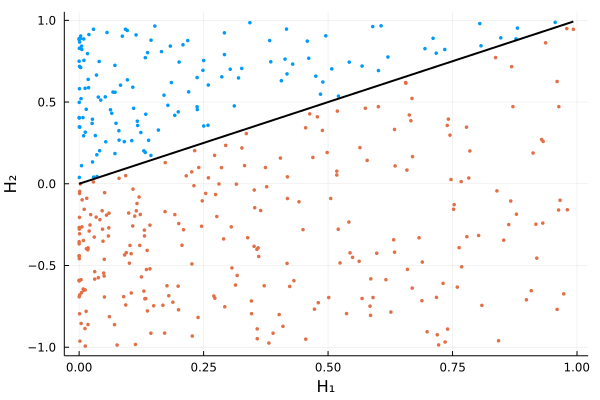

In [13]:
begin
    scatter(cldata.x1.^2, cldata.x2,
            c = Int.(cldata.y) .+ 1, legend = false,
            xlabel = "H₁", ylabel = "H₂", markersize = 2, markerstrokewidth = 0)
    plot!(identity, c = "black", w = 2)
end

In this figure there is a linear decision boundary (given by $H_1 - H_2 = 0$)  that can perfectly separate the red from the blue points (although some points lie very close to the decision boundary).

#### Exercise 6 (optional)
In Exercise 5 of \"Generalized Linear Regression\" we fitted the bike sharing data using only `:temp` and `:humidity` as predictors. The quality of the fit was not good. Here we try to improve the fit by including more predictors. Many predictors can be treated as categorical, e.g. even the `:hour`, which is actually an ordered, periodic integer, can be treated as categorical to give the linear model a lot of flexibility. Try out different transformations of the input until you find a linear Poisson model that fits the data clearly better than what we had in the previous Exercise. You can measure quality of fit by looking at the same plot as in the previous exercise or by using cross-validation.

In [14]:
bikesharing = OpenML.load(42712, maxbytes = 10^5) |> DataFrame

,season,year,month,hour,holiday,weekday,workingday,weather,temp
,Cat…?,Float64?,Float64?,Float64?,Cat…?,Float64?,Cat…?,Cat…?,Float64?
1,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84
2,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02
3,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02
4,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84
5,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84
6,spring,0.0,1.0,5.0,False,6.0,False,misty,9.84
7,spring,0.0,1.0,6.0,False,6.0,False,clear,9.02
8,spring,0.0,1.0,7.0,False,6.0,False,clear,8.2
9,spring,0.0,1.0,8.0,False,6.0,False,clear,9.84


dropmissing!(bikesharing);

In [15]:
schema(bikesharing)

┌────────────┬───────────────────────────────┬──────────────────────────────────
│ names      │ scitypes                      │ types                           ⋯
├────────────┼───────────────────────────────┼──────────────────────────────────
│ season     │ Union{Missing, Multiclass{4}} │ Union{Missing, CategoricalValue ⋯
│ year       │ Union{Missing, Continuous}    │ Union{Missing, Float64}         ⋯
│ month      │ Union{Missing, Continuous}    │ Union{Missing, Float64}         ⋯
│ hour       │ Union{Missing, Continuous}    │ Union{Missing, Float64}         ⋯
│ holiday    │ Union{Missing, Multiclass{2}} │ Union{Missing, CategoricalValue ⋯
│ weekday    │ Union{Missing, Continuous}    │ Union{Missing, Float64}         ⋯
│ workingday │ Union{Missing, Multiclass{2}} │ Union{Missing, CategoricalValue ⋯
│ weather    │ Union{Missing, Multiclass{4}} │ Union{Missing, CategoricalValue ⋯
│ temp       │ Union{Missing, Continuous}    │ Union{Missing, Float64}         ⋯
│ feel_temp  │ Union{Missing

In [16]:
coerce!(bikesharing, :count => Count, :hour => Multiclass, :weekday => Multiclass);

┌ Info: Trying to coerce from `Union{Missing, Float64}` to `Multiclass`.
│ Coerced to `Union{Missing,Multiclass}` instead.
└ @ ScientificTypes /Users/simonlee/.julia/packages/ScientificTypes/SiP2Y/src/convention/coerce.jl:174
┌ Info: Trying to coerce from `Union{Missing, Float64}` to `Multiclass`.
│ Coerced to `Union{Missing,Multiclass}` instead.
└ @ ScientificTypes /Users/simonlee/.julia/packages/ScientificTypes/SiP2Y/src/convention/coerce.jl:174
┌ Info: Trying to coerce from `Union{Missing, Float64}` to `Count`.
│ Coerced to `Union{Missing,Count}` instead.
└ @ ScientificTypes /Users/simonlee/.julia/packages/ScientificTypes/SiP2Y/src/convention/coerce.jl:174


In [17]:
import MLJGLMInterface: LinearCountRegressor

In [18]:
m_old = machine(OneHotEncoder(drop_last = true) |> LinearCountRegressor(),
	         select(bikesharing, [:temp, :humidity]),
             bikesharing.count);

In [19]:
fit!(m_old, verbosity = 0);

In [20]:
m_new = machine(OneHotEncoder(drop_last = true) |> LinearCountRegressor(),
	         select(bikesharing, [:temp, :humidity, :hour, :weekday, :holiday]),
             bikesharing.count);

In [21]:
fit!(m_new, verbosity = 0);


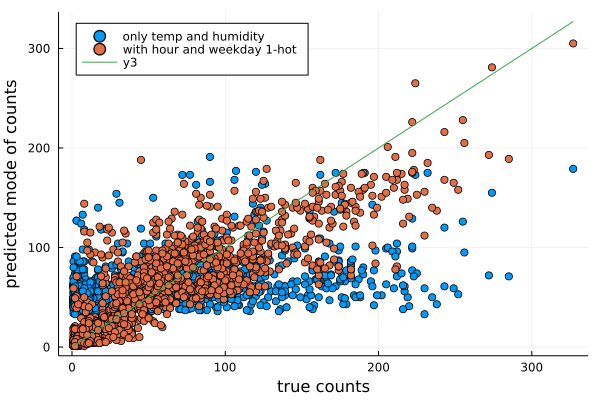

In [22]:
let
	scatter(bikesharing.count, predict_mode(m_old), label = "only temp and humidity")
	scatter!(bikesharing.count, predict_mode(m_new), label = "with hour and weekday 1-hot")
	plot!(identity, xlabel = "true counts", ylabel = "predicted mode of counts",
		  legend_position = :topleft)
end

In [23]:
evaluate!(m_new, resampling = CV(), measure = LogLoss())

Evaluating over 6 folds: 100%[=========================] Time: 0:00:01


PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────────────┬───────────┬─────────────┬─────────┬──────────
│ measure                        │ operation │ measurement │ 1.96*SE │ per_fol ⋯
├────────────────────────────────┼───────────┼─────────────┼─────────┼──────────
│ LogLoss(                       │ predict   │ 8.59        │ 0.865   │ [8.38,  ⋯
│   tol = 2.220446049250313e-16) │           │             │         │         ⋯
└────────────────────────────────┴───────────┴─────────────┴─────────┴──────────
                                                                1 column omitted


In [24]:
evaluate!(m_old, resampling = CV(), measure = LogLoss())

PerformanceEvaluation object with these fields:
  measure, operation, measurement, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_rows
Extract:
┌────────────────────────────────┬───────────┬─────────────┬─────────┬──────────
│ measure                        │ operation │ measurement │ 1.96*SE │ per_fol ⋯
├────────────────────────────────┼───────────┼─────────────┼─────────┼──────────
│ LogLoss(                       │ predict   │ 17.5        │ 1.08    │ [18.0,  ⋯
│   tol = 2.220446049250313e-16) │           │             │         │         ⋯
└────────────────────────────────┴───────────┴─────────────┴─────────┴──────────
                                                                1 column omitted


With the additional predictors `:hour`, `:weekday` and `:holiday` interpreted as categorical predictors, we get indeed a much better fit of the bike sharing data."